<a href="https://colab.research.google.com/github/mr-nudo/intelligent-tools/blob/master/4_Gaussian_Mixture_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Gaussian Mixture Models for generating new faces

Training a Gaussian mixture model on the Olivetti faces dataset.

First get the olivetti data sets.

In [4]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

In [5]:
print(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   =====================
    Classes    

In [6]:
olivetti.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

## 1. Train a Gaussian mixture model on the Olivetti faces dataset. If you are training on your local system, you can use the dataset as is. But if you are using Google Colab, you will have to reduce your data, otherwise, your RAM will crash. For now, we will provide you with the code for PCA dimensionality reduction, which you will learn what it does in the following weeks. You can use the provided code for that part.

Step 1: Shuffle and split the data to have a better distribution using StratifiedShuffleSplit. Split the data to train set, test set and validation set.

In [7]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_valid_idx, test_idx = next(strat_split.split(olivetti.data,
                                                   olivetti.target))
X_train_valid = olivetti.data[train_valid_idx]
y_train_valid = olivetti.target[train_valid_idx]
X_test = olivetti.data[test_idx]
y_test = olivetti.target[test_idx]

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

In [5]:
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(280, 4096) (280,)
(80, 4096) (80,)
(40, 4096) (40,)


this part is to avoid overflow of your RAM, ignore it for now. you will learn more about them on next lecture.

In [8]:
from sklearn.decomposition import PCA

pca = PCA(0.97)
X_train_reduced = pca.fit_transform(X_train)
X_valid_reduced = pca.transform(X_valid)
X_test_reduced = pca.transform(X_test)

Using the GaussianMixture of sklearn, and with 20 number of components, train a gaussian mixture model on your data.

(set your random state to 42 for reproducibility and you can use the X_train_reduced from the previous part)


In [9]:
from sklearn.mixture import GaussianMixture # ------ fill here

gm = GaussianMixture(random_state=42)
gm.fit(X_train_reduced)
y_pred = gm.predict(X_test_reduced)

## 2. Generate 30 new faces by sampling from your model and visualize them.

In [10]:
n_generated_faces = 30 #---- fill here
generated_faces_reduced_format, y_gen_faces = gm.sample(n_samples=n_generated_faces) # ---- fill here


Now just run this line and ignore what it does as well:D
since your results are in reduced format, you have to use the inverse transform.

In [11]:
generated_faces = pca.inverse_transform(generated_faces_reduced_format)

plot your generated faces. you can use the provided function for it.

In [12]:
import matplotlib.pyplot as plt

def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64) #---- fill here: Turn your results to picture format by reshaping it
                      # you are supposed to check the original dataset and
                      # figure out what was the resolution of the original images
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

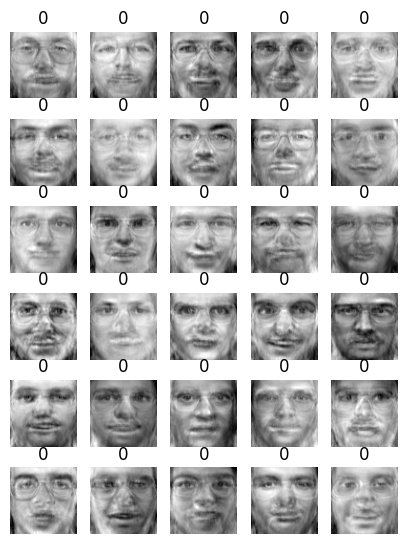

In [13]:
plot_faces(generated_faces, y_gen_faces)

## 3. Take the first 5 images of your dataset and create 15 changed images. The first five(changed) images must be rotated 90 degrees counterclockwise. The second five (changed) images must beflipped. The third five images must be darker than the original images (multiply their channels by 0.3.)

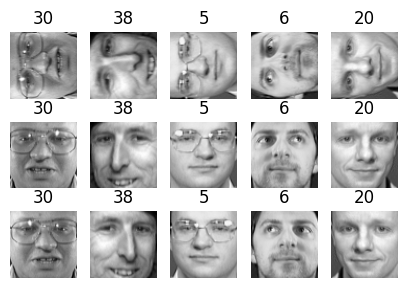

In [14]:
import numpy as np
n_rotated = 5
rotated = np.rot90(X_train[:n_rotated].reshape(-1, 64, 64), k=1, axes=(1, 2)) # --- fill here
rotated = rotated.reshape(-1, 64*64)
y_rotated = y_train[:n_rotated]

n_flipped = 5
flipped = np.flip(X_train[:n_flipped].reshape(-1, 64, 64), axis=2) # --- fill here
flipped = flipped.reshape(-1, 64*64)
y_flipped = y_train[:n_flipped]

n_darkened = 5
darkened = X_train[:n_darkened].copy()
darkened *= 0.3 # --- fill here
y_darkened = y_train[:n_darkened]

X_bad_faces = np.r_[rotated, flipped, darkened]
y_bad = np.concatenate([y_rotated, y_flipped, y_darkened])

plot_faces(X_bad_faces, y_bad)

## 4. Compute the log-likelihood of each sample. (you can use the gm methods.) Compare these log-likelihoods with the main data scores (maybe for the first 15 samples). Explain the results and describe how we use GMMs for anomaly detection.

ignore this part for now:D

In [15]:
X_bad_faces_pca = pca.transform(X_bad_faces)

In [16]:
# --- fill here
log_likelihoods_main = gm.score_samples(X_train_reduced[:15])
log_likelihoods_bad = gm.score_samples(X_bad_faces_pca)

Log-likelihoods of the first 15 main data samples:
 [ -93.11766087  -44.8998906   -58.18460061 -100.15166726  -32.38939613
  -50.61074422  -50.10758841  -67.51536799  -22.62650874  -52.44933027
  -64.31998182  -91.91668896  -45.35032193  -50.61115782  -39.63061307]
Log-likelihoods of the 15 transformed images:
 [ -84.66110814  -77.70392007  -88.90877907 -133.43552204  -89.17423238
  -74.21617506  -35.44019461  -32.73112902  -93.65518503  -23.46041377
  -57.90650924  -66.20377033  -46.91521691  -51.8831474   -56.92830993]


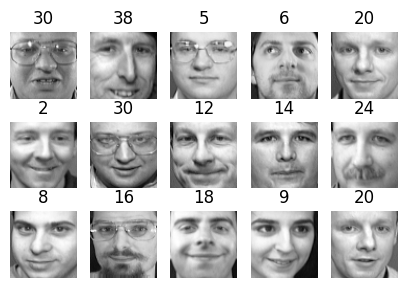

In [17]:
# --- fill here
print("Log-likelihoods of the first 15 main data samples:\n", log_likelihoods_main)
print("Log-likelihoods of the 15 transformed images:\n", log_likelihoods_bad)
plot_faces(X_train[:15], y_train[:15])